<a href="https://colab.research.google.com/github/Jacobanderson42/Project4/blob/master/Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !pip install --upgrade seaborn==0.9.0
# !pip install obspy

In [0]:
def HydPSD(url,duration,title):
  from obspy import read,Stream, Trace
  import numpy as np
  import matplotlib.pyplot as plt
  from scipy.fftpack import fft

  %matplotlib inline
  # data_url_1 = 'https://rawdata.oceanobservatories.org/files/RS01SLBS/LJ01A/09-HYDBBA102/2017/10/06/OO-HYVM1--YDH-2017-10-06T20:00:00.000015.mseed'
  # st = read(data_url_1)
  st = read(url)
  fs = st[0].stats.sampling_rate

  x = []
  xfft=np.zeros(int(fs))
  for i in range(duration):
    t_start = st[0].stats.starttime+i
    t_end = st[0].stats.starttime+i+1
    sliced = st.slice(t_start, t_end)
    x_i = (sliced[0].data)*np.hanning(len(sliced[0].data))
    xfft_i = np.array(2*np.square(fft(x_i,64000))/(len(x_i)*fs))
    x.append(x_i)
    xfft = np.add(xfft,xfft_i)
  xfft=xfft/duration
  
  fig = plt.figure()
  fre = np.linspace(1,fs,64000)
  data_db = 10*np.log10(np.abs(xfft))+169-128.9
  plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
  plt.xlabel('frequency [Hz]')
  plt.ylabel('PSD [dB**2/Hz]')
  plt.xlim(0,15000)
  plt.title(title)
  plt.show()

In [0]:
def HydSpec(url,t,max_freq,title):
  from obspy import read,Stream, Trace
  import numpy as np
  import matplotlib.pyplot as plt
  from matplotlib import mlab

  %matplotlib inline
  data_url_1 = url
  st = read(data_url_1)
  fs = st[0].stats.sampling_rate

  t_start = st[0].stats.starttime 
  t_end = st[0].stats.starttime + t
  sliced = st.slice(t_start, t_end)

  npts = len(sliced[0])
  end = npts / fs
  nfft = int(fs/16)  # number of fft points of each bin
  per_lap = 0.90      # percentage of overlap
  nlap = int(nfft * float(per_lap))   # number of overlapped samples

  # using mlab to create the array of spectrogram 
  specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
  specgram = 10 * np.log10(specgram) +169-128.9
  plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
  plt.xlabel('time (s)')
  plt.ylabel('freq (Hz)')
  plt.colorbar()
  plt.ylim(0,max_freq)
  plt.title(title)

Windy and Rainy

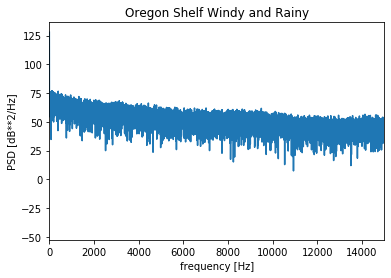

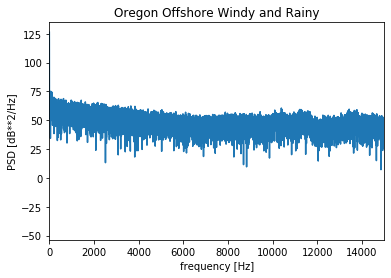

In [4]:
HydPSD('https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/02/03/OO-HYEA2--YDH-2019-02-03T06:00:00.000000.mseed',1,'Oregon Shelf Windy and Rainy')
HydPSD('https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/02/03/OO-HYEA1--YDH-2019-02-03T06:00:00.000000.mseed',1,'Oregon Offshore Windy and Rainy')

Windy and not Rainy

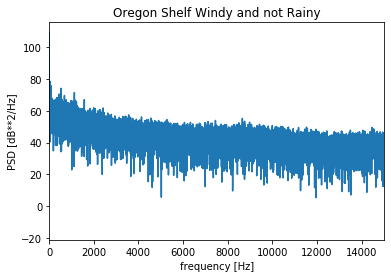

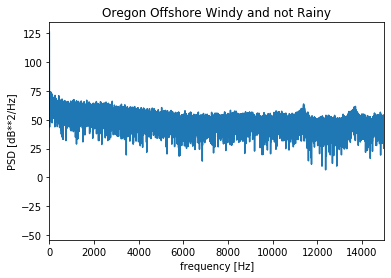

In [5]:
HydPSD('https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/04/02/OO-HYEA2--YDH-2019-04-02T19:19:00.835563.mseed',1,'Oregon Shelf Windy and not Rainy')
HydPSD('https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/03/02/OO-HYEA1--YDH-2019-03-02T18:00:00.000000.mseed',1,'Oregon Offshore Windy and not Rainy')

Not Windy and Rainy

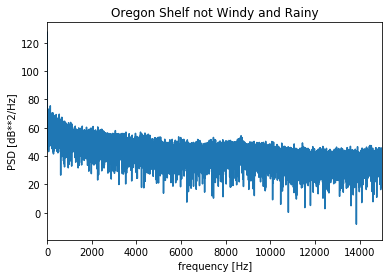

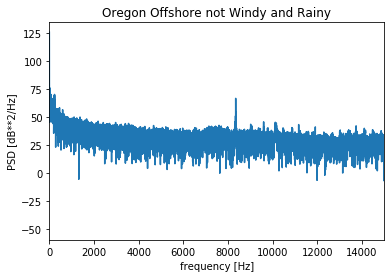

In [6]:
HydPSD('https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/02/01/OO-HYEA2--YDH-2019-02-01T00:00:00.000015.mseed',1,'Oregon Shelf not Windy and Rainy')
HydPSD('https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/02/01/OO-HYEA1--YDH-2019-02-01T00:00:00.000015.mseed',1,'Oregon Offshore not Windy and Rainy')

Not Windy and not Rainy

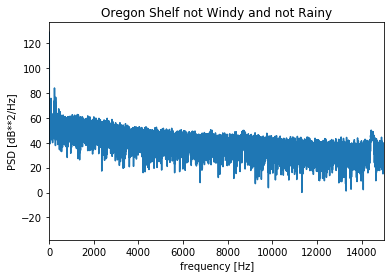

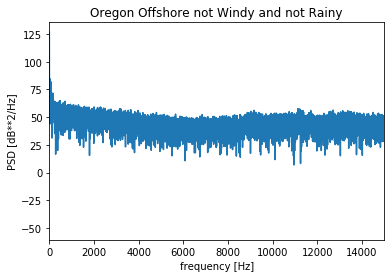

In [7]:
HydPSD('https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/02/04/OO-HYEA2--YDH-2019-02-04T12:00:00.000015.mseed',1,'Oregon Shelf not Windy and not Rainy')
HydPSD('https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/02/04/OO-HYEA1--YDH-2019-02-04T12:00:00.000000.mseed',1,'Oregon Offshore not Windy and not Rainy')

Marine Mammal

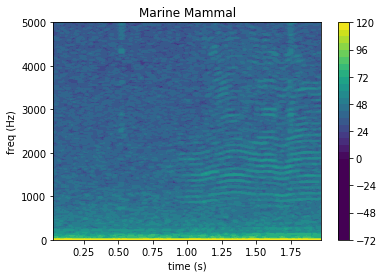

In [8]:
HydSpec('https://rawdata.oceanobservatories.org/files/RS01SLBS/LJ01A/09-HYDBBA102/2017/10/06/OO-HYVM1--YDH-2017-10-06T20:00:00.000015.mseed',2,5000,'Marine Mammal')

Airgun

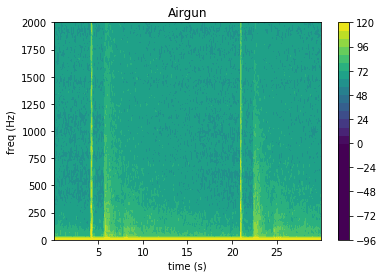

In [9]:
HydSpec('https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2019/08/01/OO-AXVM1--YDH-2019-08-01T10:00:00.000015.mseed',30,2000,'Airgun')

Earthquake

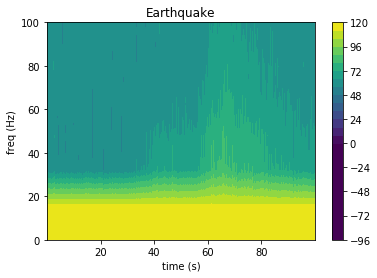

In [10]:
HydSpec('https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2020/02/19/OO-AXVM1--YDH-2020-02-19T21:40:00.000000.mseed',100,100,"Earthquake")